In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [3]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

#🔧 Transformación

In [4]:
df['Charges.Daily'] = df['account'].str.get('Charges').str.get('Monthly')/30
df = pd.concat([df.drop('customer',axis=1),pd.json_normalize(df['customer'])],axis = 1)
df = pd.concat([df.drop('phone',axis=1),pd.json_normalize(df['phone'])],axis = 1)
df = pd.concat([df.drop('internet',axis=1),pd.json_normalize(df['internet'])],axis = 1)
df = pd.concat([df.drop('account',axis=1),pd.json_normalize(df['account'])],axis = 1)


In [5]:
def to_boolean(dataframe,column_name):
    if (sorted(dataframe[column_name].unique().tolist()) == sorted(['','No','Yes'])):
        dataframe[column_name] = dataframe[column_name].replace({'' : np.nan , 'No': False, 'Yes' : True})
    if sorted(dataframe[column_name].unique().tolist()) == sorted(['No','Yes']):
        dataframe[column_name] = dataframe[column_name].replace({'No': False, 'Yes' : True})
    if sorted(dataframe[column_name].unique().tolist()) == sorted(['No phone service','No','Yes']):
        dataframe[column_name] = dataframe[column_name].replace({'No phone service' : np.nan , 'No': False, 'Yes' : True})
    if sorted(dataframe[column_name].unique().tolist()) == sorted(['No internet service','No','Yes']):
        dataframe[column_name] = dataframe[column_name].replace({'No internet service' : np.nan , 'No': False, 'Yes' : True})
    if sorted(dataframe[column_name].unique().tolist()) == sorted([0,1]):
        dataframe[column_name] = dataframe[column_name].replace({0: False, 1: True})

        

In [6]:
for col in df.columns.tolist():
    to_boolean(df,col)

In [7]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors = 'coerce')

#📊 Carga y análisis

In [8]:
df.describe()


,Charges.Daily,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,2.157337,32.346498,64.720098,2280.634213
std,1.004319,24.571773,30.129572,2268.632997
min,0.608333,0.000000,18.250000,18.800000
25%,1.180833,9.000000,35.425000,400.225000
50%,2.343333,29.000000,70.300000,1391.000000
75%,2.995833,55.000000,89.875000,3785.300000
max,3.958333,72.000000,118.750000,8684.800000


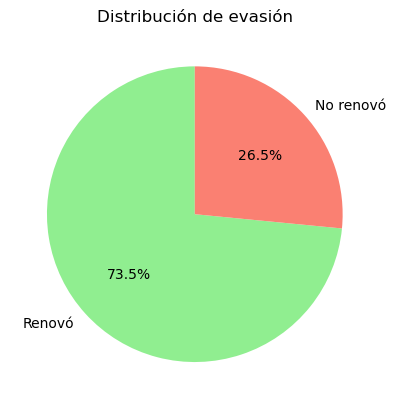

In [9]:
plt.pie(df['Churn'].value_counts(dropna=True), 
        labels=['Renovó','No renovó'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'salmon'])

plt.title('Distribución de evasión')

plt.show()

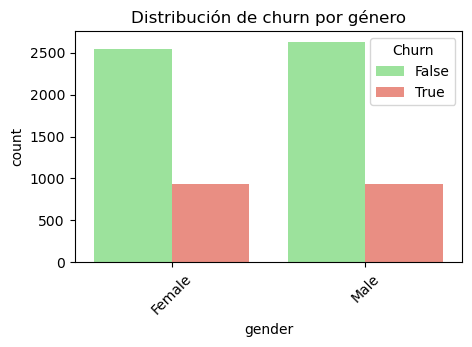

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='gender', hue='Churn', palette=['lightgreen', 'salmon'])
plt.title('Distribución de churn por género')
plt.xticks(rotation=45)
plt.show()

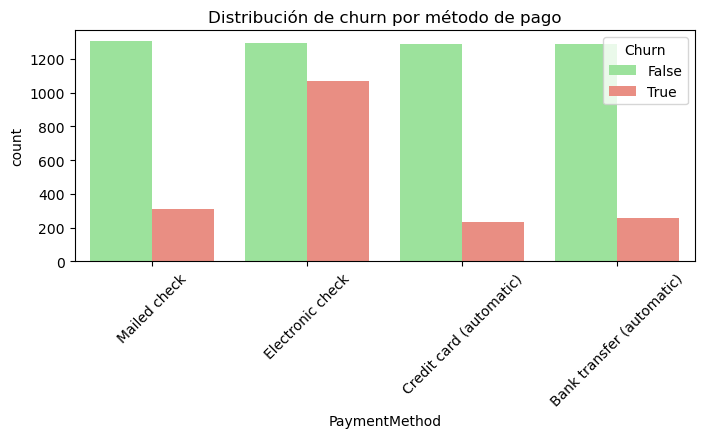

In [11]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=['lightgreen', 'salmon'])
plt.title('Distribución de churn por método de pago')
plt.xticks(rotation=45)
plt.show()

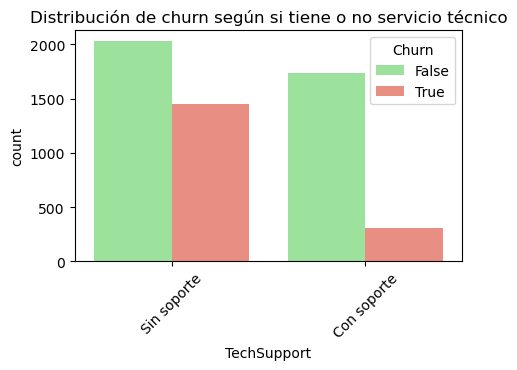

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette=['lightgreen', 'salmon'])
plt.title('Distribución de churn según si tiene o no servicio técnico')
plt.xticks(rotation=45,labels=['Sin soporte', 'Con soporte'], ticks = [0,1])
plt.show()

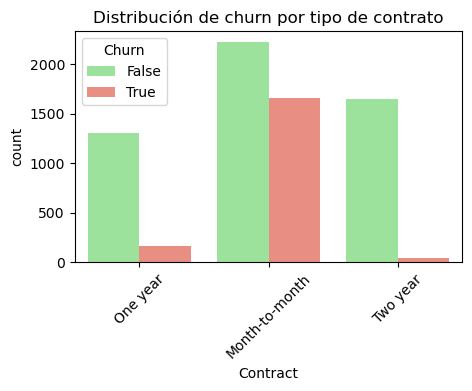

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['lightgreen', 'salmon'])
plt.title('Distribución de churn por tipo de contrato')
plt.xticks(rotation=45)
plt.show()

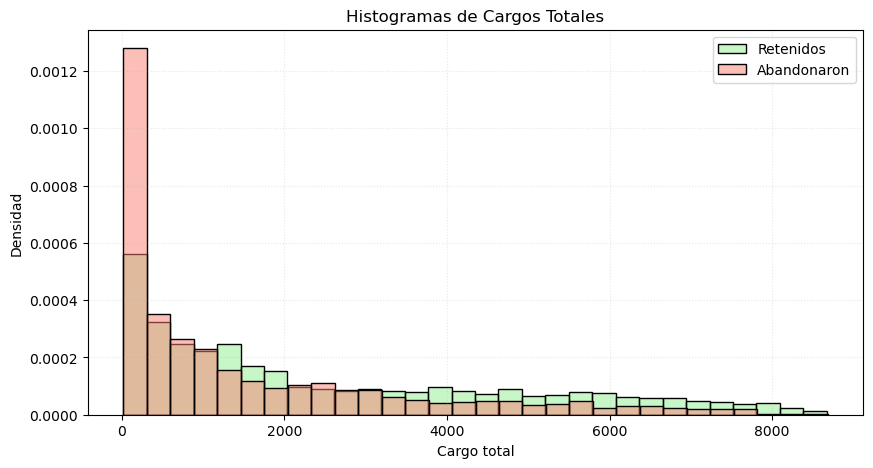

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Churn']==False]['Charges.Total'], color='lightgreen', label='Retenidos', stat="density", bins=30, alpha=0.5)
sns.histplot(df[df['Churn']==True]['Charges.Total'], color='salmon', label='Abandonaron', stat="density", bins=30, alpha=0.5)
plt.title('Histogramas de Cargos Totales')
plt.xlabel('Cargo total')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.3)
plt.show()


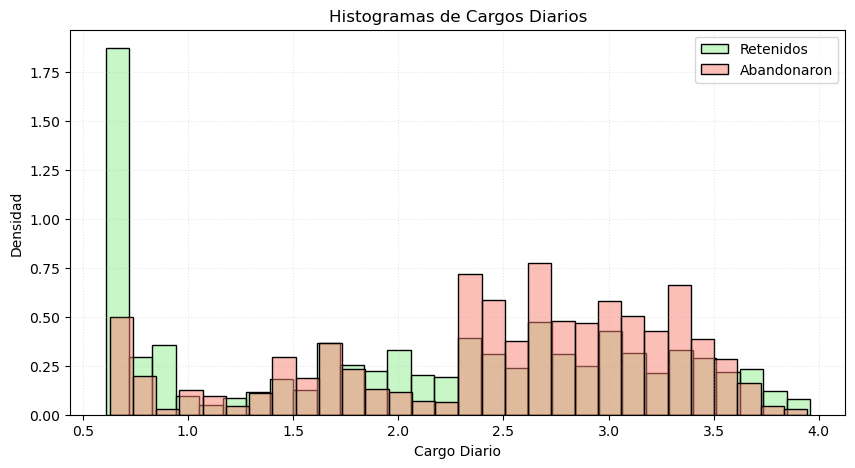

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Churn']==False]['Charges.Daily'], color='lightgreen', label='Retenidos', stat="density", bins=30, alpha=0.5)
sns.histplot(df[df['Churn']==True]['Charges.Daily'], color='salmon', label='Abandonaron', stat="density", bins=30, alpha=0.5)
plt.title('Histogramas de Cargos Diarios')
plt.xlabel('Cargo Diario')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.3)
plt.show()

#📄Informe final

🔹 Introducción: 
En este proceso buscamos, a partir de una base de datos que contiene datos sobre los clientes de una empresa de telecomunicaciones, encontrar las causas por las que los clientes están dando de baja el servicio, ante un aparente aumento que preocupa al negocio. Para esto conseguiremos la base de datos a partir de github, realizaremos una exploración y limpieza de datos para un uso más cómodo de esta; y a partir de esto realizaremos análisis a partir de relaciones entre los atributos de los clientes y gráficos que las ilustren, para sacar conclusiones sobre el problema.

🔹 Limpieza y Tratamiento de Datos:
Importamos a patir de github la base de datos, luego expandimos ciertos atributos no atómicos (diccionarios dentro de atributos) para que lo sean y transformamos datos de naturaleza booleana (a esto nos referimos a que toman solo dos valores, o tres en el caso de indefinido si consideramos lógica trivaluada) a bool. Posteriormente convertimos la columna Charges.Total a tipo numérico.

🔹 Análisis Exploratorio de Datos: 
Realizamos gráficos para ver la proporción de churn por cliente en general, y luego la relacionamos con varaibles como género del cliente, método de pago, si tiene o no servicio técnico, tipo de contrato y cargos del cliente, tanto diarios como totales.

🔹 Conclusiones e Insights: 
A partir del análisis vimos que alrededor de 1/4 de los clientes no renueva su contrato, y que esto parece ser un efecto que se relaciona con muchas variables a la vez, habría que ver como se relacionan estas variables entre sí también. Para comenzar podemos ver que el género no tiene mucho que ver con el churn, a diferencia del método de pago, tipo de contrato y servicio técnico. Encontramos que hay una evasión más alta en clientes sin servicio técnico, los que pagan con cheque electrónico y los que renuevan contrato mes a mes. En los dos últimos análisis vimos que la mayor parte de abandonos se dan en los clientes con cargos totales bajos y que los que pagan poco diariamente suelen quedarse con el servicio, a diferencia de los que tienen cargos diarios más altos.

🔹 Recomendaciones: 
En base a nuestro análisis podríamos recomendar que se intenten impulsar contratos de larga duración que aseguren servicio técnico para los clientes, dos de los factores que vimos que importaban. Se recomienda también que el método de pago sea alguno de los automáticos y no cheques electrónicos. A partir de los dos últimos análisis se puede concluir que la mayoría de clientes que abandonan tienen cargos totales bajos y cargos diarios altos (ya que los que pagan poco no suelen abandonar) Se nos ocurre que los clientes que abandonan suelen tener cargos totales bajos no por pagar poco sino porque permanecen poco con el servicio con cargos diarios muy altos. Se podría recomendar mejorar este servicio con las recomendaciones anteriores y ofrecer cargos diarios bajos en un principio para retener a los clientes nuevos, y en el caso de que se necesiten mejorar las ganancias dejar los cargos diarios a menos de 2,2 .